<a href="https://colab.research.google.com/github/DallasAutumn/datawhale_salons/blob/master/PyTorch_s8_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-s8-task4 多层网络实现

In [0]:
from torch.autograd import Variable
from torch.utils.data import DataLoader, dataset


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

import numpy as np

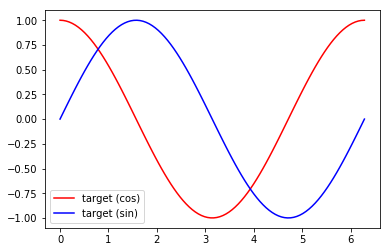

In [7]:
torch.manual_seed(1)

# hyper params
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02

# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='target (sin)')
plt.legend(loc='best')
plt.show()

In [9]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE, # 1
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, hidden_state):
        r_out, hidden_state = self.rnn(x, hidden_state)
        # x:(batch, time_stpe, input_size)
        # hidden_state:(n_layers, batch, hidden_size)
        # r_out:(batch, time_step, output_size=hidden_size)
        outs = [self.out(r_out[:, time_step, :]) for time_step in range(r_out.size(1))]
        
        return torch.stack(outs, dim=1), hidden_state
    
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


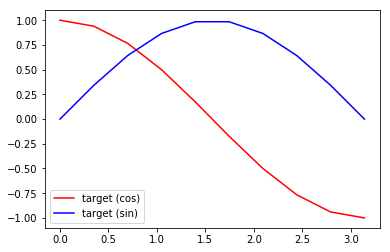

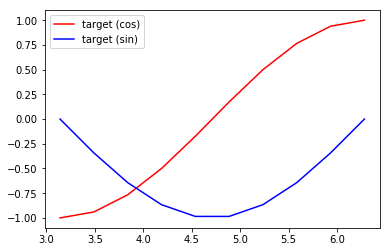

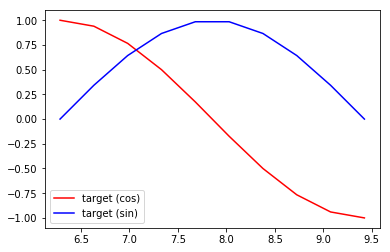

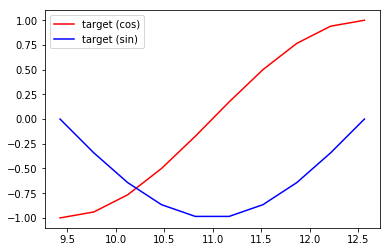

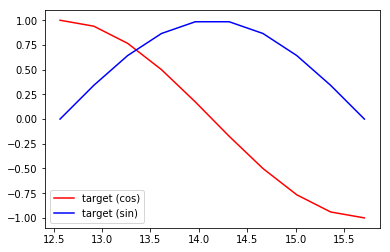

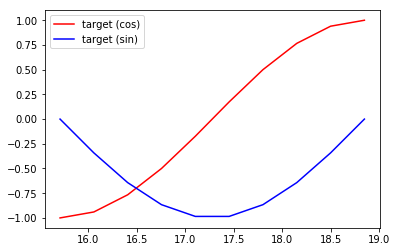

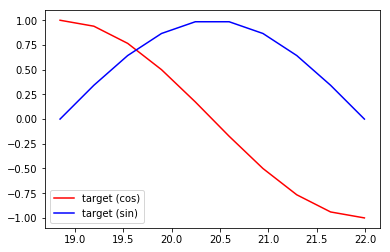

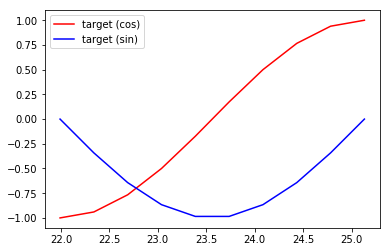

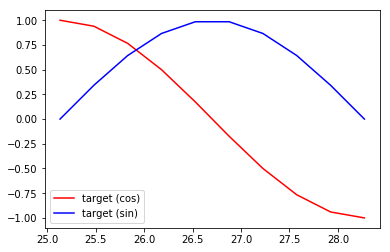

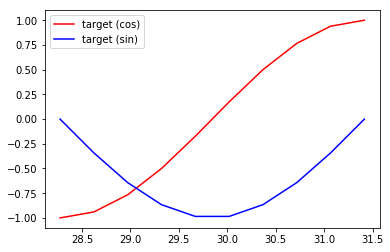

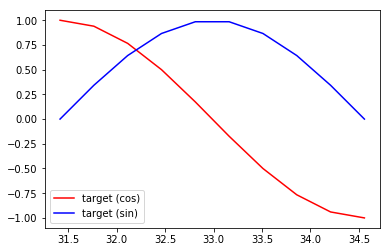

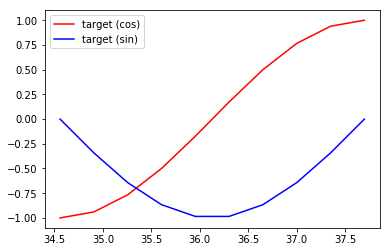

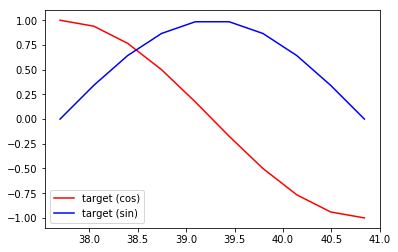

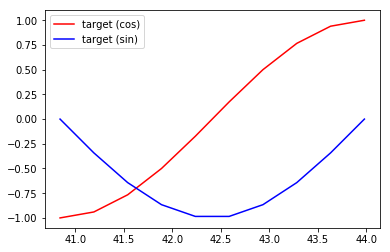

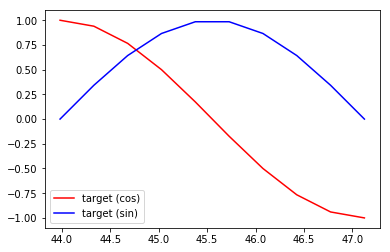

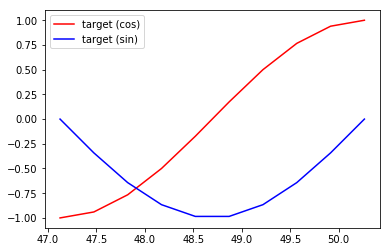

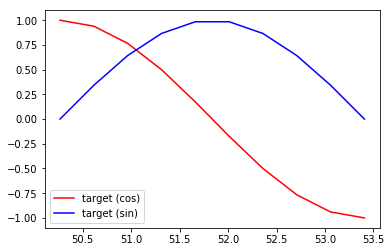

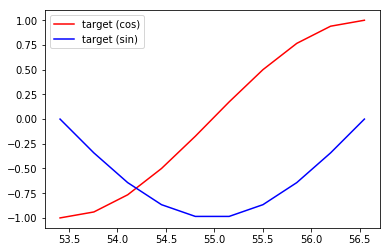

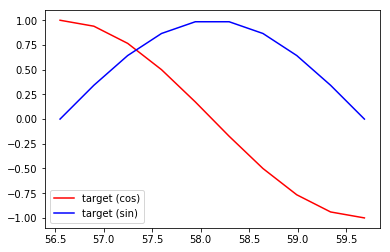

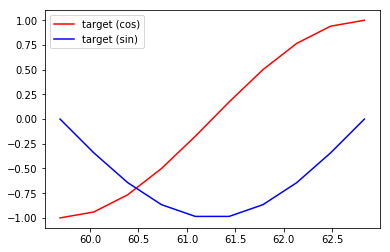

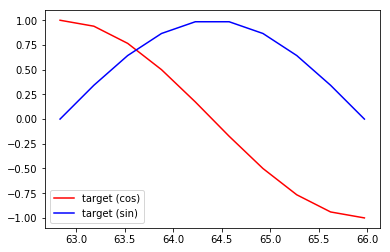

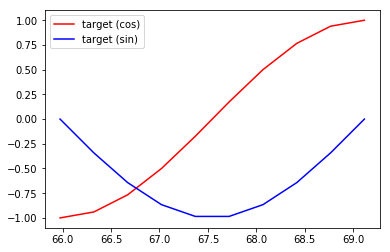

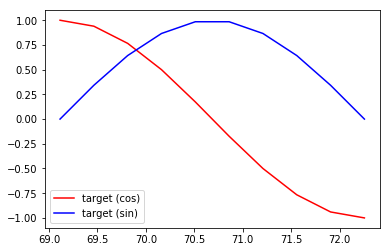

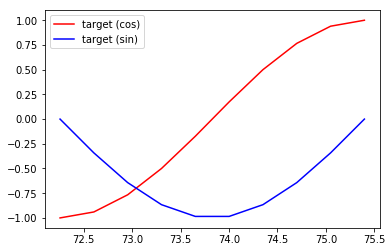

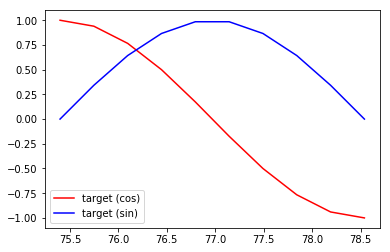

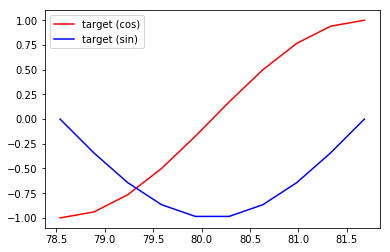

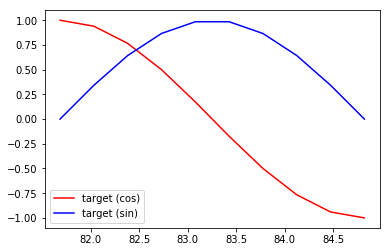

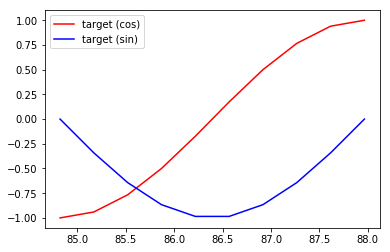

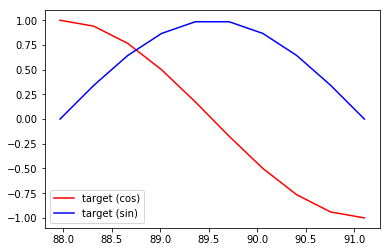

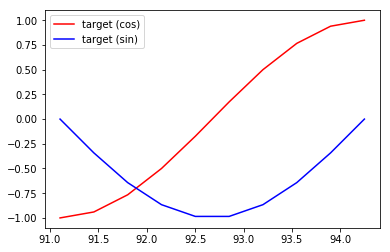

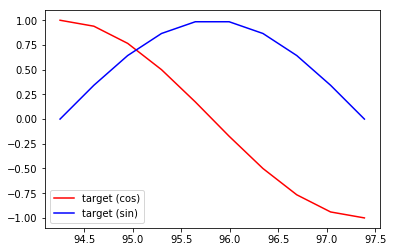

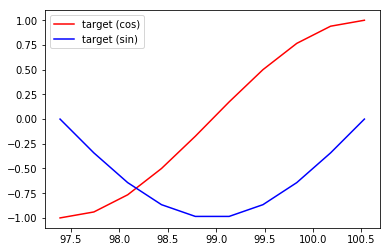

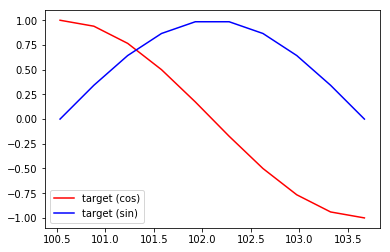

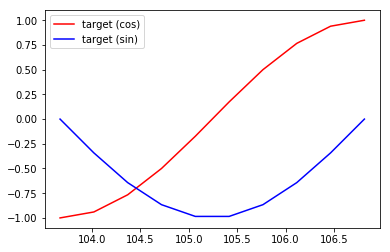

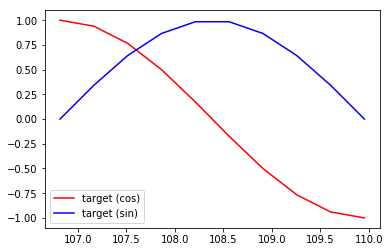

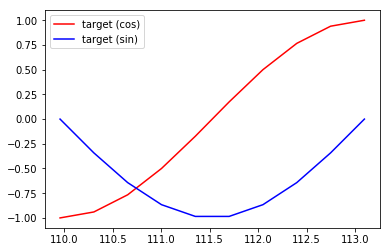

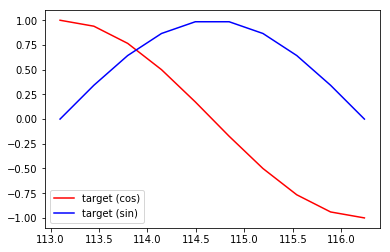

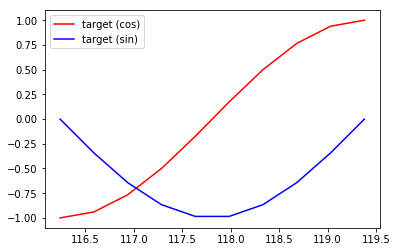

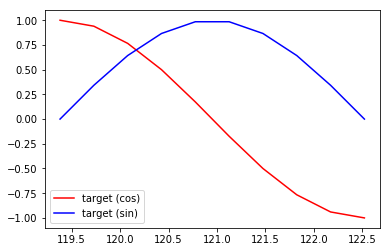

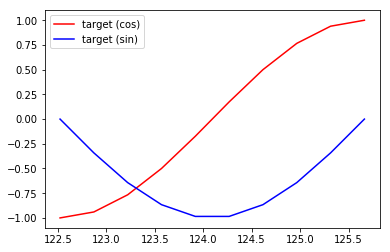

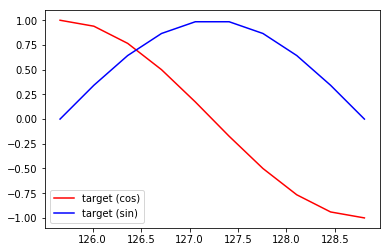

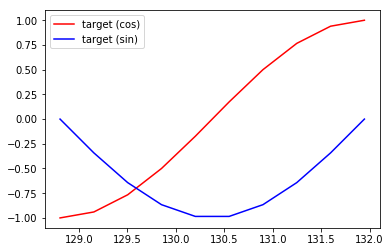

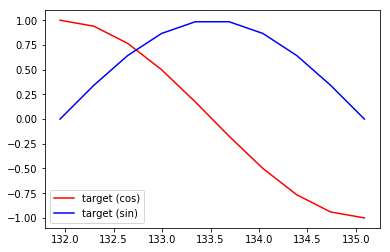

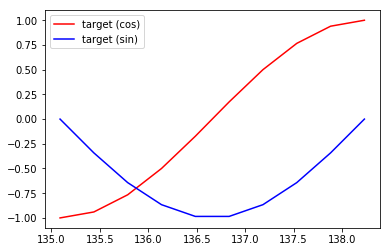

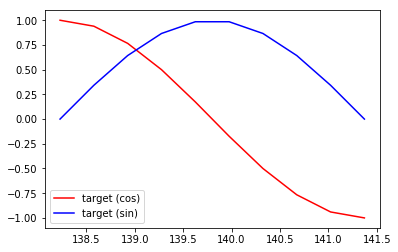

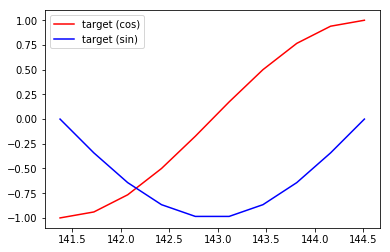

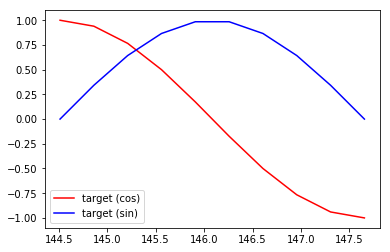

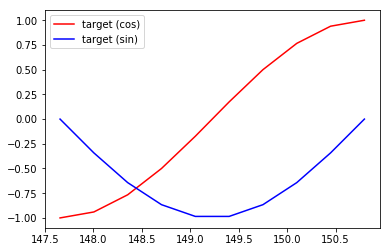

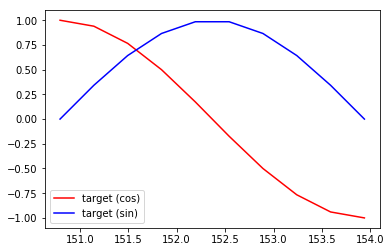

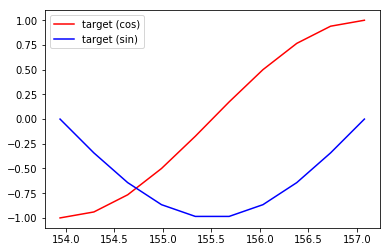

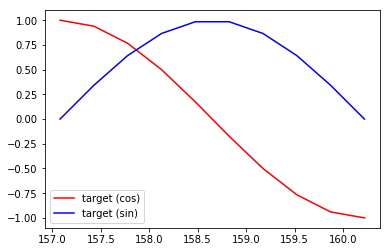

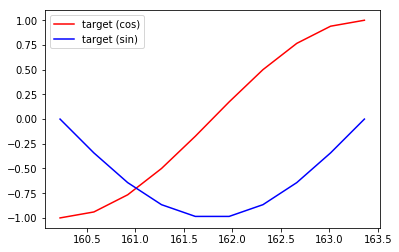

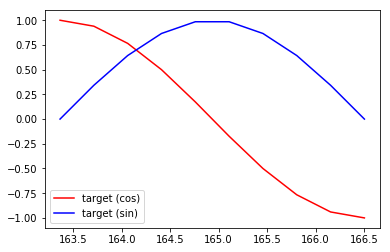

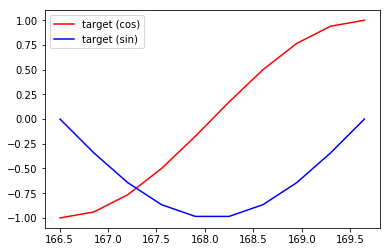

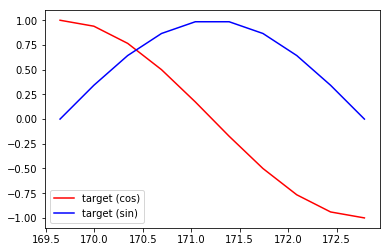

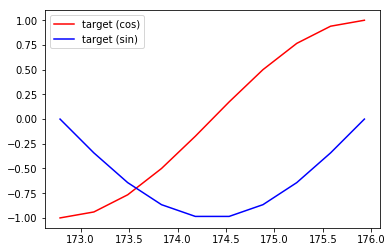

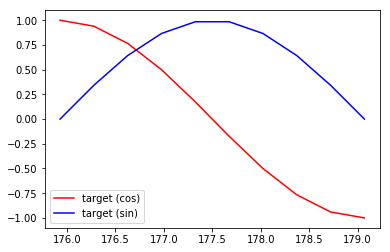

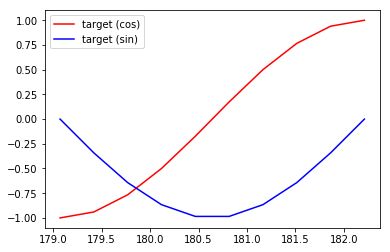

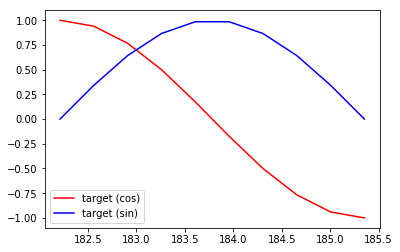

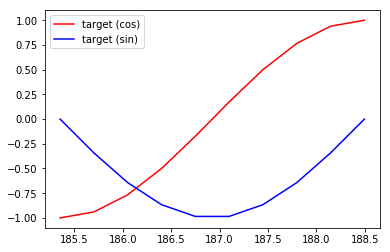

In [13]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

plt.ion()
# training
hidden_state = None
for step in range(60):
    start, end = step * np.pi, (step + 1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis])) # shape(batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    
    prediction, hidden_state = rnn(x, hidden_state)
    hidden_state = Variable(hidden_state.data) # important!!
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.cla()
    plt.plot(steps, y_np, 'r-', label='target (cos)')
    plt.plot(steps, x_np, 'b-', label='target (sin)')
    plt.legend(loc='best')
    plt.pause(0.2)

plt.ioff()
plt.show()